<p style="font-size:30px;">
Level 3

<p style="font-size:30px;">
Task1: Restaurant Reviews

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Use the absolute path to load the CSV file
file_path = r"C:\Users\tarun\Desktop\Python\Dataset .csv"

# Load the dataset 
df = pd.read_csv("Dataset .csv")


In [2]:
# To show the head of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


<p style="font-size:20px;">
Analyze the text reviews to identify the most common positive and negative keywords.

In [3]:
#Count the number of rating of different rating values
reviews_data = df["Rating text"].value_counts()
print(reviews_data)

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64


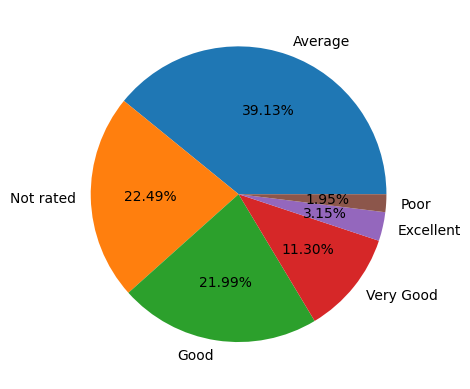

In [4]:
#Plotting Piechart for the data
plt.pie(reviews_data.values, labels=reviews_data.index, radius= 1, autopct= "%.2f%%")
plt.show()

In [5]:
#the most common positive and negative keywords
print("The most common positive and negative text ratings are:")
print(reviews_data[0:2])

The most common positive and negative text ratings are:
Rating text
Average      3737
Not rated    2148
Name: count, dtype: int64


<p style="font-size:20px;">
Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [6]:
# Calculate the average length of reviews
reviews =  df["Rating text"]
total_reviews = len(reviews)
total_review_len = 0

for review in reviews:
    total_review_len += len(review.split())

In [7]:
avg_review_length = total_review_len/total_reviews
print("Average review length:" , round(avg_review_length,2))

Average review length: 1.34


In [8]:
# Relationship between rating and review length
vs = {}
for rating in df["Aggregate rating"].unique():
    fil = df.loc[df["Aggregate rating"] == rating] ["Rating text"]
    total_len = 0
    total_reviews = len(fil)
    for reviews in fil:
        total_len += len(reviews.split())
        avg_len = total_len / total_reviews
        vs[float(rating)] = avg_len

In [9]:
print("Rating vs Average reviews length")
print(vs)

Rating vs Average reviews length
{4.8: 1.0, 4.5: 1.0, 4.4: 2.0, 4.9: 1.0, 4.0: 2.0, 4.2: 2.0, 4.3: 2.0, 3.6: 1.0, 4.7: 1.0, 3.0: 1.0, 3.8: 1.0, 3.7: 1.0, 3.2: 1.0, 3.1: 1.0, 0.0: 2.0, 4.1: 2.0, 3.3: 1.0, 4.6: 1.0, 3.9: 1.0, 3.4: 1.0, 3.5: 1.0, 2.2: 1.0, 2.9: 1.0, 2.4: 1.0, 2.6: 1.0, 2.8: 1.0, 2.1: 1.0, 2.7: 1.0, 2.5: 1.0, 1.8: 1.0, 2.0: 1.0, 2.3: 1.0, 1.9: 1.0}


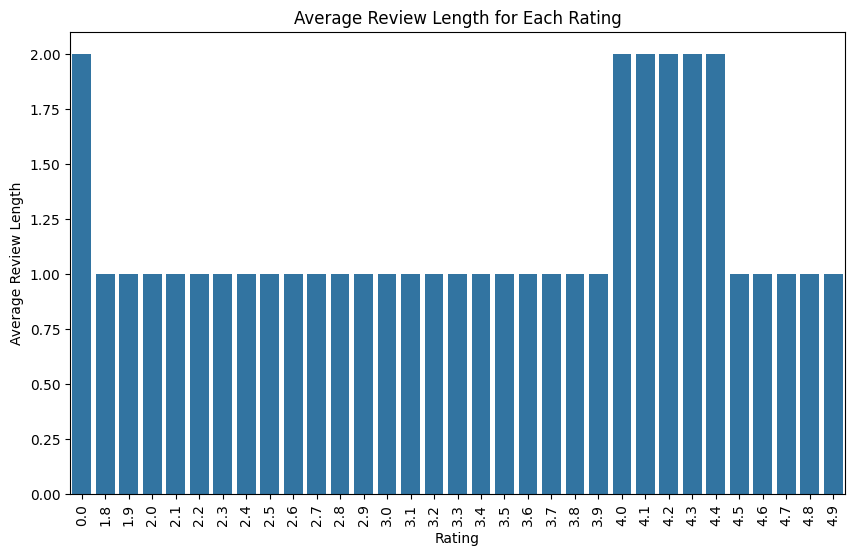

In [10]:
# Plot the result
ratings = list(vs.keys())
average_lengths = list(vs.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=ratings, y=average_lengths)
plt.title('Average Review Length for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Average Review Length')
plt.xticks(rotation=90)
plt.show()